In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, LambdaCallback
from keras.layers import Flatten, Activation

from keras.layers import Input
from keras.models import Model
from keras.layers import Dropout
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import h5py
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


10000/10000 [==============================] - 4s 372us/step
Evaluate model accuracy without new images: 97.78999999999999
Classfication report of Test dataset: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       980
          1       1.00      1.00      1.00      1135
          2       1.00      1.00      1.00      1032
          3       1.00      1.00      1.00      1010
          4       1.00      1.00      1.00       982
          5       1.00      1.00      1.00       892
          6       1.00      1.00      1.00       958
          7       1.00      1.00      1.00      1028
          8       1.00      1.00      1.00       974
          9       1.00      1.00      1.00      1009

avg / total       1.00      1.00      1.00     10000

Confusion report of Test dataset: 
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [  

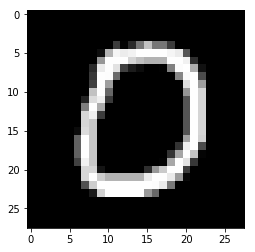

In [4]:
if __name__=='__main__':
    
    #Load Test dataset
    (_, _), (X_test, y_test) = mnist.load_data('mnist.npz')
    
    #Perform all the necessary preprocessing
    
    X_test = X_test.astype('float32')/255
    X_test = X_test.reshape(-1, 28, 28, 1)
    y_test_cat = to_categorical(y_test)

    #Load the model which was previously saved
    model = load_model('./model/save_model_fit.hdf5')

    print("Evaluate model accuracy without new images: {}".format(model.evaluate(X_test,y_test_cat)[1] *100))
    
    #Convert the prediction to number
    y_pred = np.argmax(y_test_cat,1)
    
    target_number = ['0','1','2','3','4','5','6','7','8','9']
    print("Classfication report of Test dataset: \n {}".format(classification_report(y_test,y_pred,target_names = target_number)))
    print("Confusion report of Test dataset: \n{}".format(confusion_matrix(y_test,y_pred)))

    a = int(input('\nEnter a random index number to predict:'))
    
    plt.imshow(X_test[a].reshape(28,28),cmap='gray')
    print('\nModel Prediction: {}'.format(np.argmax(model.predict(X_test[a].reshape(-1,28,28,1)))))
    
    